# Carteiras aleatórias X IBOV

## 1 - Importando as ferramentas

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf 
import random

pd.options.display.float_format = '{:.6f}'.format

## 2 - Coletando os dados

In [45]:
papers_sym = pd.read_csv('./IBOV.csv',sep=';')
amount_invest = 10000

papers = list(papers_sym['Codigo'])

start, end = '2022-01-01','2023-01-01'

In [47]:
ibov = yf.download('^BVSP', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [48]:
data = yf.download(tickers= papers, start=start, end=end)

[*********************100%***********************]  87 of 87 completed

9 Failed downloads:
['USIM5.SA', 'ALOS3.SA', 'AZUL4.SA']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['AMOB3.SA', 'LREN3.SA', 'SLCE3.SA', 'CXSE3.SA']: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)))
['ISAE4.SA', 'BRAV3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641006000, endDate = 1672542000")')


In [49]:
data_close = data['Close']
ibov_close = ibov['Close']

## 3 - Visualizando os dados

## 4 - Tratando os dados

In [ ]:
ibov_close.info()
#data_close.info()
data_close_clean = data_close.dropna(how='all')
data_close_clean = data_close_clean.dropna(axis=1, thresh=250)

data_close_clean.info()

## 5 - Analisando os dados

In [74]:
daily_return = data_close_clean.pct_change()

daily_return_cum = (1 + daily_return).cumprod()
daily_return_cum.iloc[0] = 1.0

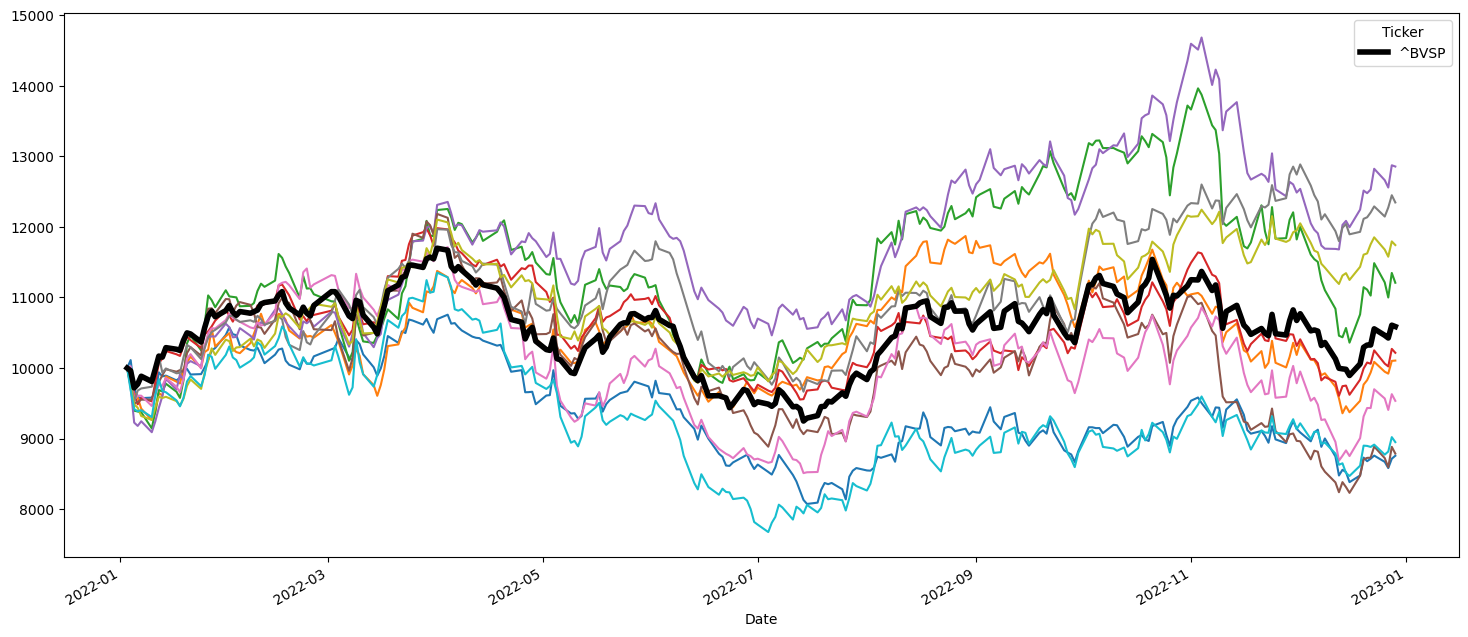

In [161]:
n_papers = 5

fig, ax = plt.subplots(figsize=(22,8))

for i in range(10):
    wallet = random.choices(data_close_clean.columns, k=n_papers)

    wallet = (amount_invest/n_papers) * daily_return_cum.loc[:,wallet] 

    wallet['Balance'] = wallet.sum(axis=1)
    wallet['Return'] = wallet['Balance'].pct_change()
    #wallet['Return Cum'] = (1+wallet['Return']).cumprod()
    wallet['Balance'].plot(figsize=(18,8),ax=ax)

ibov_close /= ibov_close.iloc[0]
(ibov_close * amount_invest).plot(color='black', linewidth=4, ax=ax )

plt.show()